In [1]:
import numpy as np
import PIL
import random
from PIL import Image
from PIL import ImageDraw

In [2]:
def createPalette(number):
    palette = []
    number = int(number)
    for i in range(number):
        R = random.randint(0,255)
        G = random.randint(0,255)
        B = random.randint(0,255)
        palette.append((R,G,B))
    return(palette)

In [3]:
def polar_sprite(size,colors):
    size = int(size)
    im = Image.new("RGB", (size,size))
    draw = PIL.ImageDraw.Draw(im,None)
    colors = int(colors)
    palette = createPalette(colors)
    center = (size/2,size/2)
    for i in range(int(size/2)):
        num_to_color = random.randint(0,int(size/2))
        D = np.sqrt(((center[0]-i)**2)+(center[1]**2))
        radius_list = np.random.uniform(0, D, num_to_color)
        theta = np.arctan(((size/2)-i)/(size/2))
        for r in radius_list:
            x_coord = int((size/2) - r*np.sin(theta))
            y_coord = int((size/2) - r*np.cos(theta))
            color = palette[random.randint(0,int(colors)-1)]
            draw.point((x_coord,y_coord),color)
            
    for i in range(int(size/2)):
        num_to_color = random.randint(0,int(size/2))
        D = np.sqrt(((center[0]-i)**2)+(center[1]**2))
        radius_list = np.random.uniform(0, D, num_to_color)
        theta = np.arctan(((size/2)-i)/(size/2))
        for r in radius_list:
            x_coord = int((size/2) - r*np.cos(theta))
            y_coord = int((size/2) - r*np.sin(theta))
            color = palette[random.randint(0,int(colors)-1)]
            draw.point((x_coord,y_coord),color)
            
    for i in range(int(size/2)):
        num_to_color = random.randint(0,int(size/2))
        D = np.sqrt(((center[0]-i)**2)+(center[1]**2))
        radius_list = np.random.uniform(0, D, num_to_color)
        theta = np.arctan(((size/2)-i)/(size/2))
        for r in radius_list:
            x_coord = int((size/2) - r*np.cos(theta))
            y_coord = int((size/2) + r*np.sin(theta))
            color = palette[random.randint(0,int(colors)-1)]
            draw.point((x_coord,y_coord),color)
            
    for i in range(int(size/2)):
        num_to_color = random.randint(0,int(size/2))
        D = np.sqrt(((center[0]-i)**2)+(center[1]**2))
        radius_list = np.random.uniform(0, D, num_to_color)
        theta = np.arctan(((size/2)-i)/(size/2))
        for r in radius_list:
            x_coord = int((size/2) - r*np.sin(theta))
            y_coord = int((size/2) + r*np.cos(theta))
            color = palette[random.randint(0,int(colors)-1)]
            draw.point((x_coord,y_coord),color)
    
    #Add some depth to the empty lines on the odd creatures
    if size%2 == 1:
        to_fill = int(size/3)
        num_to_color = random.randint(0,to_fill)
        x_values = np.random.uniform(0, int(size/3), num_to_color)
        for x in x_values:
            color = palette[random.randint(0,int(colors)-1)]
            draw.point((x,int(size/2)),color)
            
    if size % 2 == 0:
        crop = im.crop((0,0,int(size/2),size))
        crop = crop.transpose(PIL.Image.FLIP_LEFT_RIGHT)
        im.paste(crop, (int(size/2),0,size,size))
    
    if size % 2 == 1:
        crop = im.crop((0,0,int(size/2),size))
        crop = crop.transpose(PIL.Image.FLIP_LEFT_RIGHT)
        im.paste(crop, (int(size/2)+1,0,size,size))
        
    #Fill a chance for the top and bottom quarter of the central verticle to be filled
    #Top half
    if size % 2 == 1:
        to_fill = int(size/3)
        num_to_color = random.randint(0,to_fill)
        y_values = np.random.uniform(0, int(size/3), num_to_color)
        for y in y_values:
            color = palette[random.randint(0,int(colors)-1)]
            draw.point((int(size/2), y) ,color)
    #Bottom half
    if size % 2 == 1:
        to_fill = int(size/3)
        num_to_color = random.randint(0,to_fill)
        y_values = np.random.uniform(0, int(size/3), num_to_color)
        for y in y_values:
            color = palette[random.randint(0,int(colors)-1)]
            draw.point((int(size/2), size-y) ,color)
            
    return im

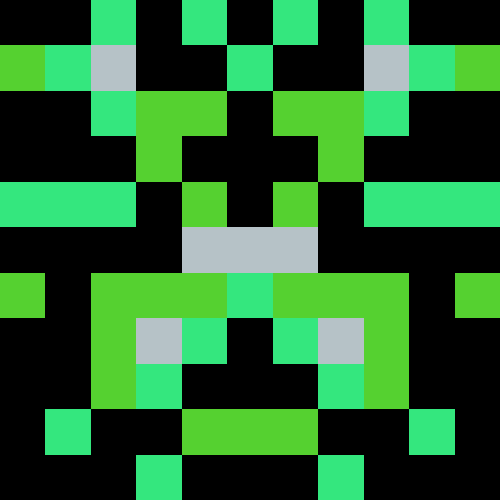

In [30]:
sprite = polar_sprite(11,3)
sprite = sprite.resize((500,500),PIL.Image.NEAREST)
sprite

In [62]:
sprite.save("polar_radiance_100_4.png")